# Loan Prediction problem using logistic regression

###### Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

In [155]:
#Loading the packages

import numpy as np
import pandas as pd
import seaborn as sns                   
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [156]:
#Load the dataset

train_data = pd.read_csv(r"C:\Users\BUGALIA\Downloads\Online courses\Coursera\ML_projects\Loan_Prediction\Data\train_ctrUa4K.csv")
test_data = pd.read_csv(r"C:\Users\BUGALIA\Downloads\Online courses\Coursera\ML_projects\Loan_Prediction\Data\test_lAUu6dG.csv")

In [157]:
train=train_data.copy()
test=test_data.copy()

###### EDA

In [158]:
print("Train data columns: \n",train.columns)
print("Test data columns: \n",test.columns)

Train data columns: 
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Test data columns: 
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [159]:
train.info()
print("\n")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 

In [160]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [161]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [162]:
train.shape, test.shape

((614, 13), (367, 12))

In [163]:
#Dropping missing values

train=train.dropna()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
Loan_ID              480 non-null object
Gender               480 non-null object
Married              480 non-null object
Dependents           480 non-null object
Education            480 non-null object
Self_Employed        480 non-null object
ApplicantIncome      480 non-null int64
CoapplicantIncome    480 non-null float64
LoanAmount           480 non-null float64
Loan_Amount_Term     480 non-null float64
Credit_History       480 non-null float64
Property_Area        480 non-null object
Loan_Status          480 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


###### EDA: Visualization

###### Univariate Analysis:Features
Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

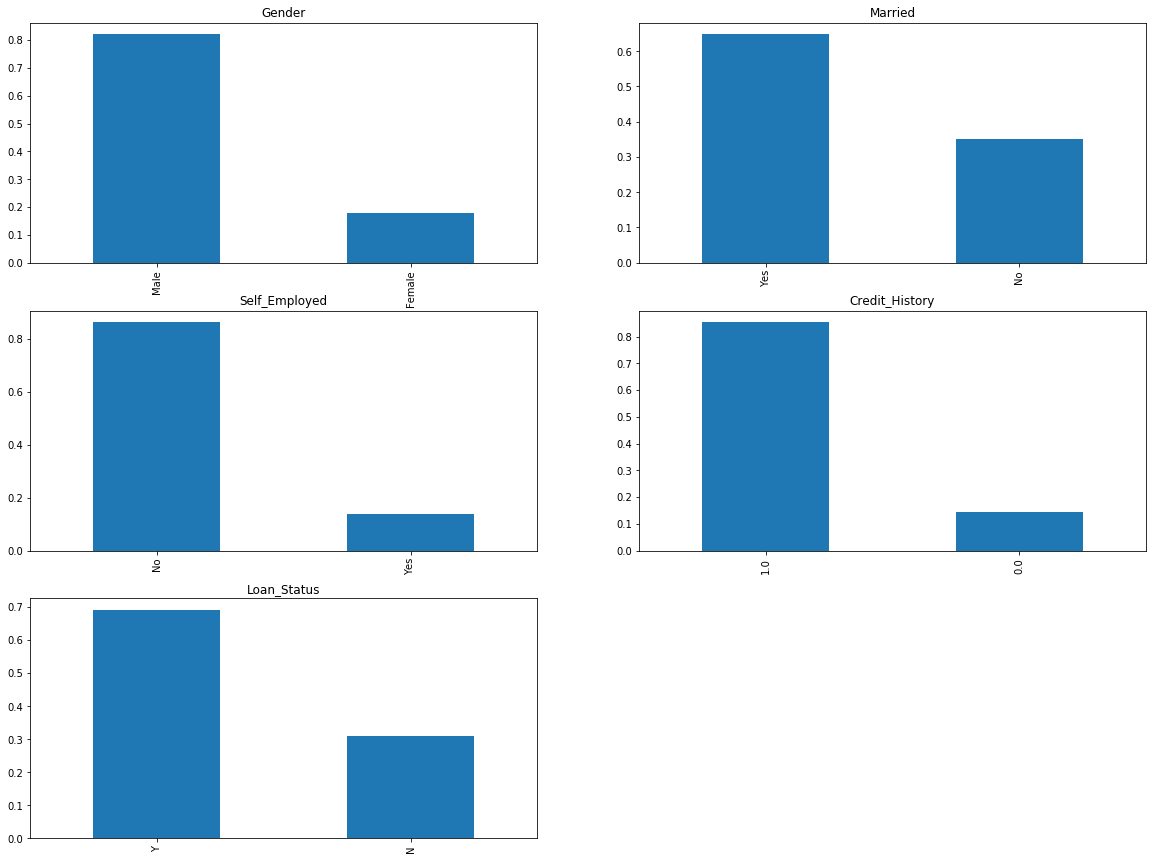

In [164]:
#Categorical features

plt.figure(1)
plt.subplot(321)
train["Gender"].value_counts(normalize=True).plot.bar(figsize=(20,15), title="Gender")
plt.subplot(322)
train["Married"].value_counts(normalize=True).plot.bar(title="Married")
plt.subplot(323)
train["Self_Employed"].value_counts(normalize=True).plot.bar(title="Self_Employed")
plt.subplot(324)
train["Credit_History"].value_counts(normalize=True).plot.bar(title="Credit_History")
#Target variable
plt.subplot(325)
train["Loan_Status"].value_counts(normalize=True).plot.bar(title="Loan_Status")
plt.show()

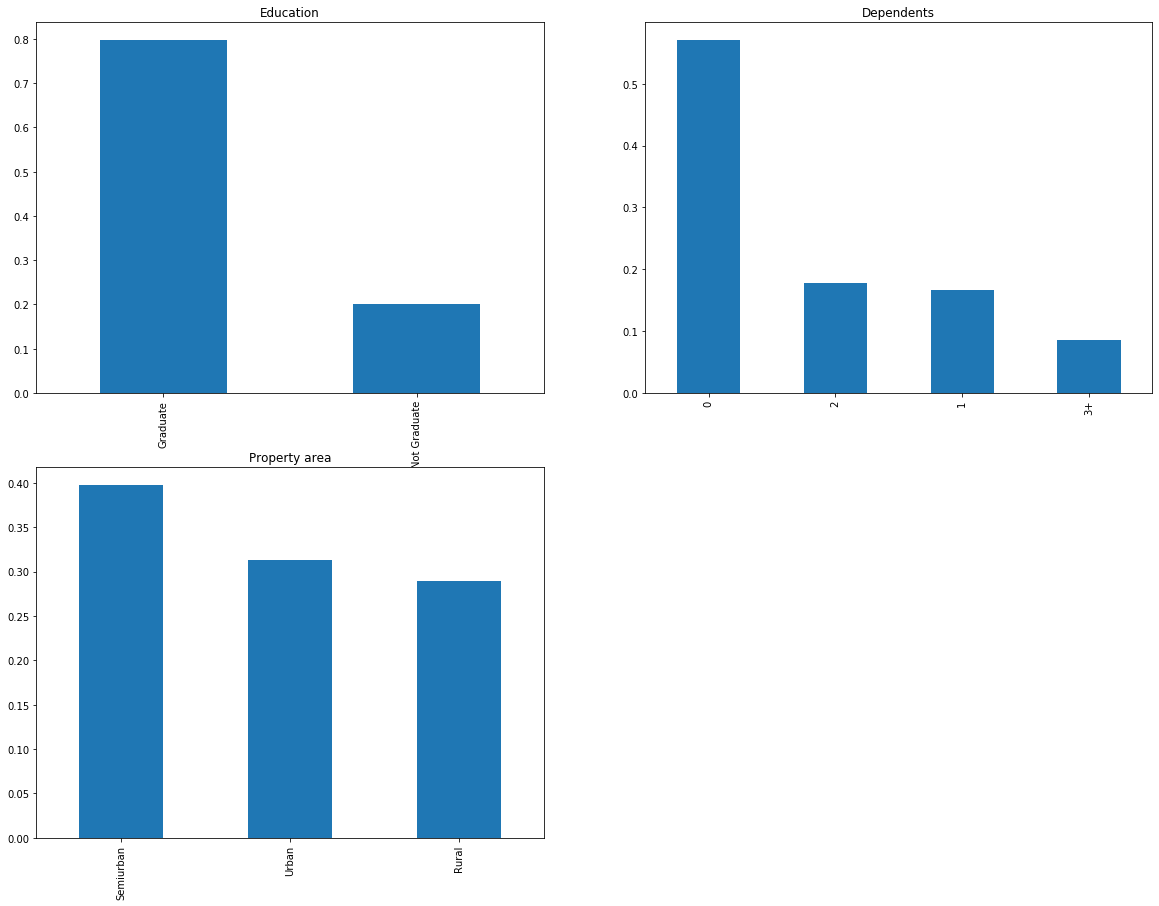

In [165]:
#Ordinal features

plt.figure(1)
plt.subplot(221)
train["Education"].value_counts(normalize=True).plot.bar(figsize=(20,15), title="Education")
plt.subplot(222)
train["Dependents"].value_counts(normalize=True).plot.bar(title="Dependents")
plt.subplot(223)
train["Property_Area"].value_counts(normalize=True).plot.bar(title="Property area")
plt.show()

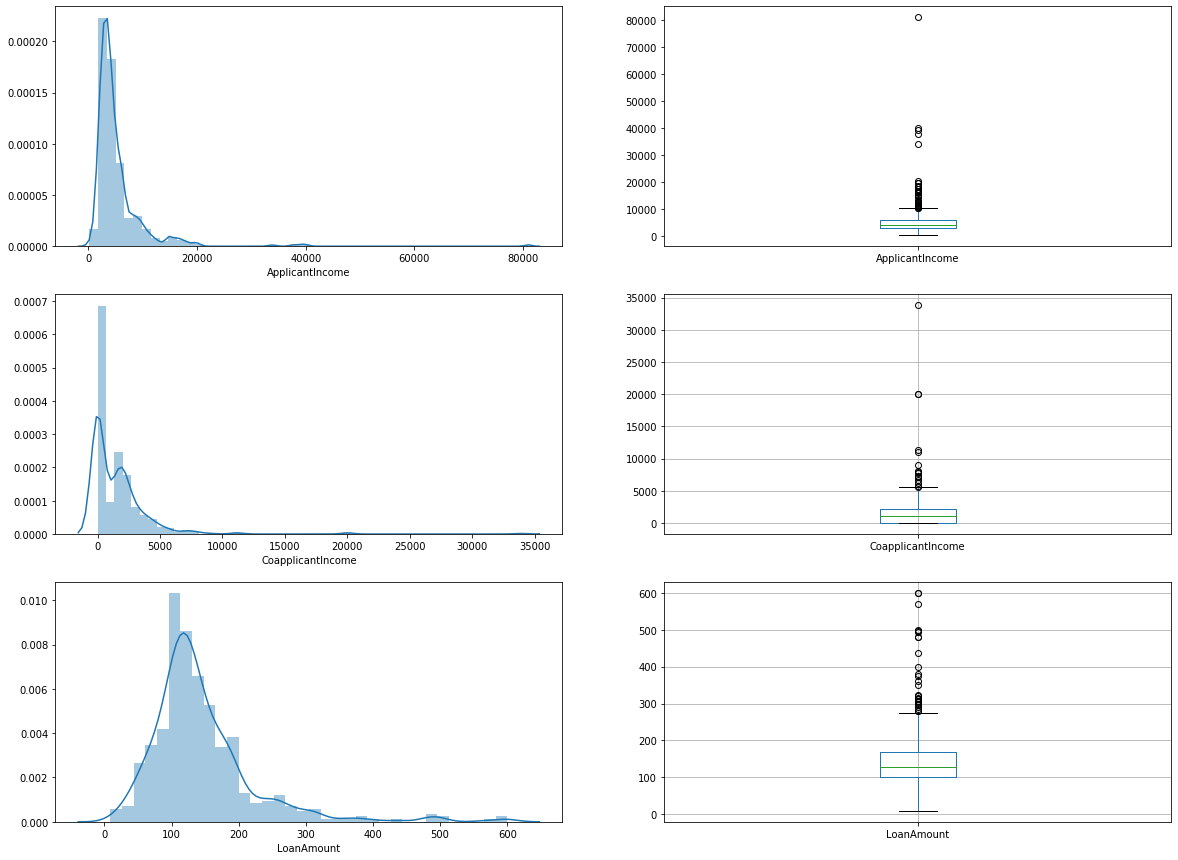

In [166]:
#Numerical features

plt.figure(1)
plt.subplot(321)
sns.distplot(train["ApplicantIncome"])
plt.subplot(322)
train["ApplicantIncome"].plot.box(figsize=(20,15))
plt.subplot(323)
sns.distplot(train["CoapplicantIncome"])
plt.subplot(324)
train.boxplot(column="CoapplicantIncome")
plt.subplot(325)
sns.distplot(train["LoanAmount"])
plt.subplot(326)
train.boxplot(column="LoanAmount")
plt.show()

###### Bivariate Analysis - Correlation

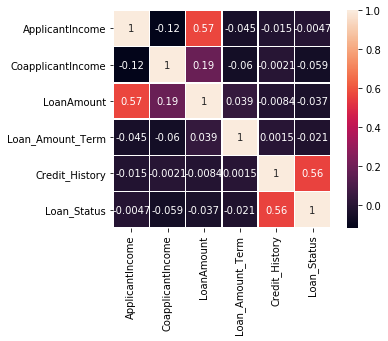

In [167]:
#converting loan status to ordinal vars
train=train_data.copy()
train["Loan_Status"].replace("Y", 1, inplace=True)
train["Loan_Status"].replace("N", 0, inplace=True)

sns.heatmap(train.corr(), square=True, annot=True, linewidth=0.5)

###### Preprocessing

In [168]:
#Missing value treatment
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [169]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [170]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [171]:
#Replacing test set missing values using train set's median and mode

test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [172]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               367 non-null object
Married              367 non-null object
Dependents           367 non-null object
Education            367 non-null object
Self_Employed        367 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


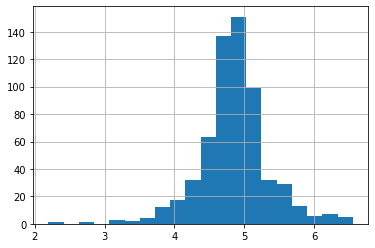

In [173]:
#Outlier treatment
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

###### Modeling

In [174]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [175]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [176]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [177]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [178]:
#Data Splitting
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [179]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(x_train, y_train)

C:\Users\BUGALIA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [180]:
pred_cv = model.predict(x_cv)

###### Performance metrics

In [181]:
accuracy_score(y_cv,pred_cv)

0.827027027027027

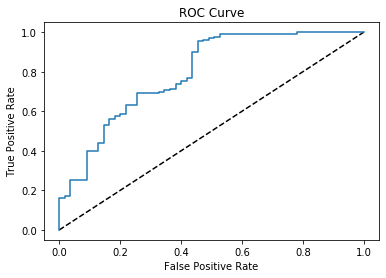

In [189]:
from sklearn.metrics import roc_curve
y_pred = model.predict_proba(x_cv)[:,1]
fpr, tpr, threshold = roc_curve(y_cv, y_pred)

plt.plot([0,1], [0,1], "k--")
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [182]:
pred_test = model.predict(test)

###### Submission csv

In [183]:
submission=pd.read_csv(r"C:\Users\BUGALIA\Downloads\Online courses\Coursera\ML_projects\Loan_Prediction\Data\sample_submission_49d68Cx.csv")

In [186]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_data['Loan_ID']

In [187]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [188]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')